In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/kaggle/input/advertising-dataset/advertising.csv'
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()

# Split the dataset
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Train an XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train_scaled, y_train)

# Predict
y_pred_train_xgb = xgb_regressor.predict(X_train_scaled)
y_pred_test_xgb = xgb_regressor.predict(X_test_scaled)

# Evaluate the model
train_rmse_xgb = mean_squared_error(y_train, y_pred_train_xgb, squared=False)
test_rmse_xgb = mean_squared_error(y_test, y_pred_test_xgb, squared=False)
train_r2_xgb = r2_score(y_train, y_pred_train_xgb)
test_r2_xgb = r2_score(y_test, y_pred_test_xgb)

print("XGBoost Regressor:")
print("Train RMSE:", train_rmse_xgb)
print("Test RMSE:", test_rmse_xgb)
print("Train R2:", train_r2_xgb)
print("Test R2:", test_r2_xgb)


XGBoost Regressor:
Train RMSE: 0.0017492347287702682
Test RMSE: 1.2047526943385323
Train R2: 0.9999998858248679
Test R2: 0.953029858014247


In [3]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters found: ", best_params)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}


In [4]:
# Train the XGBoost Regressor with the best parameters
xgb_best_regressor = xgb.XGBRegressor(objective='reg:squarederror', **best_params, random_state=42)
xgb_best_regressor.fit(X_train_scaled, y_train)

# Predict
y_pred_train_xgb_best = xgb_best_regressor.predict(X_train_scaled)
y_pred_test_xgb_best = xgb_best_regressor.predict(X_test_scaled)

# Evaluate the model
train_rmse_xgb_best = mean_squared_error(y_train, y_pred_train_xgb_best, squared=False)
test_rmse_xgb_best = mean_squared_error(y_test, y_pred_test_xgb_best, squared=False)
train_r2_xgb_best = r2_score(y_train, y_pred_train_xgb_best)
test_r2_xgb_best = r2_score(y_test, y_pred_test_xgb_best)

print("Optimized XGBoost Regressor:")
print("Train RMSE:", train_rmse_xgb_best)
print("Test RMSE:", test_rmse_xgb_best)
print("Train R2:", train_r2_xgb_best)
print("Test R2:", test_r2_xgb_best)


Optimized XGBoost Regressor:
Train RMSE: 0.008903479477316956
Test RMSE: 1.1027641321406758
Train R2: 0.9999970420225114
Test R2: 0.960645778592478


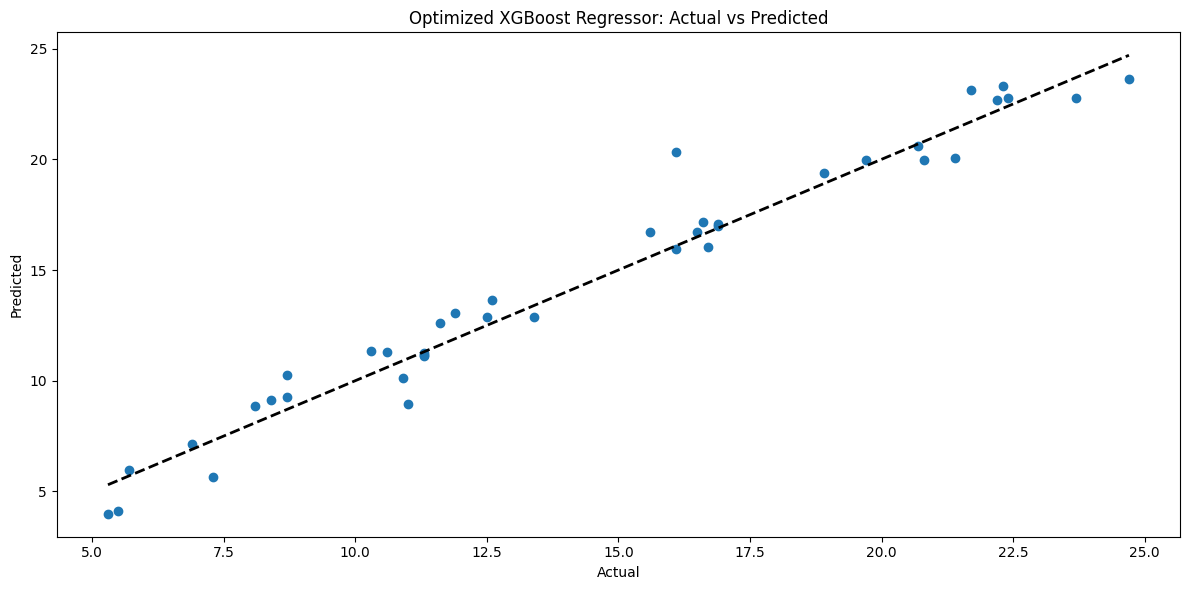

In [5]:
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(12, 6))

# Optimized XGBoost Regressor
plt.scatter(y_test, y_pred_test_xgb_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Optimized XGBoost Regressor: Actual vs Predicted')

plt.tight_layout()
plt.show()


In [6]:
# Summary
performance_summary = {
    'Model': ['Optimized XGBoost Regressor'],
    'Train RMSE': [train_rmse_xgb_best],
    'Test RMSE': [test_rmse_xgb_best],
    'Train R2': [train_r2_xgb_best],
    'Test R2': [test_r2_xgb_best]
}

performance_df = pd.DataFrame(performance_summary)

print("Model performance comparison:")
print(performance_df)


Model performance comparison:
                         Model  Train RMSE  Test RMSE  Train R2   Test R2
0  Optimized XGBoost Regressor    0.008903   1.102764  0.999997  0.960646
